<a href="https://colab.research.google.com/github/priti172000/dataanalytics.github.io/blob/main/task1_TSF_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intern Name - Priti Wagaralkar.



Task 1 : Prediction Using Supervised ML

Data Source: http://bit.ly/w-data

Problem Statement : To predict the percentage of a student based on the number of study hours

In [ ]:
import numpy as np # for working with array
import pandas as pd # working with reading data from csv file
import matplotlib.pyplot as plt # for graph



In [ ]:
#Reading data from the remote link
url = 'http://bit.ly/w-data'
dataset = pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
dataset.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Visualize the data.

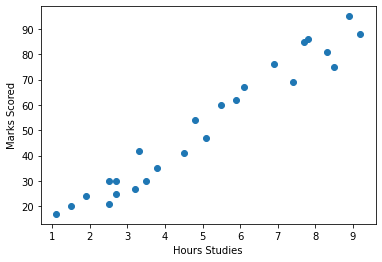

In [ ]:
plt.scatter(dataset['Hours'],dataset['Scores']) #scatter used for plot 
plt.xlabel('Hours Studies')
plt.ylabel('Marks Scored')
plt.show()

Splitting the data into  x and y

In [ ]:
x = dataset.iloc[:,:-1].values #iloc is used for select particular row or column from table
y = dataset.iloc[:,-1].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Splitting the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=10)

In [ ]:
x_train

array([[3.8],
       [8.5],
       [6.9],
       [9.2],
       [6.1],
       [7.7],
       [4.8],
       [7.8],
       [8.3],
       [2.7],
       [2.5],
       [1.9],
       [2.5],
       [8.9],
       [3.5],
       [2.7]])

In [ ]:
x_test

array([[1.5],
       [5.1],
       [3.3],
       [3.2],
       [4.5],
       [7.4],
       [1.1],
       [5.5],
       [5.9]])

In [ ]:
y_train

array([35, 75, 76, 88, 67, 85, 54, 86, 81, 30, 30, 24, 21, 95, 30, 25])

In [ ]:
y_test

array([20, 47, 42, 27, 41, 69, 17, 60, 62])

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

Traininig the model using fit function

In [ ]:
LR.fit(x_train,y_train)
print("Tranning complete")

Tranning complete


Plotting the Regression Line

In [ ]:
line = LR.coef_*x+LR.intercept_

<function matplotlib.pyplot.show>

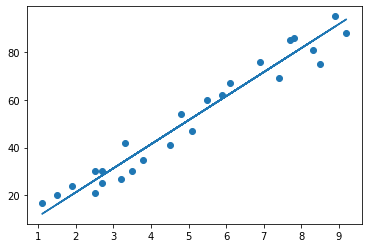

In [ ]:
plt.scatter(x,y)
plt.plot(x,line)
plt.show

Predicting on x_test

In [ ]:
y_pred_LR=LR.predict(x_test)


In [ ]:
x_test

array([[1.5],
       [5.1],
       [3.3],
       [3.2],
       [4.5],
       [7.4],
       [1.1],
       [5.5],
       [5.9]])

In [ ]:
y_test

array([20, 47, 42, 27, 41, 69, 17, 60, 62])

In [ ]:
y_pred_LR

array([16.25022454, 52.47572715, 34.36297584, 33.35671188, 46.43814338,
       75.61979826, 12.22516869, 56.500783  , 60.52583884])

Differnce between the actual data and predicted data

In [ ]:
diff_LR=y_test-y_pred_LR

In [ ]:
res_df=pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Predicted score','Original score','Difference']

In [ ]:
res_df

,Predicted score,Original score,Difference
0,16.250225,20,3.749775
1,52.475727,47,-5.475727
2,34.362976,42,7.637024
3,33.356712,27,-6.356712
4,46.438143,41,-5.438143
5,75.619798,69,-6.619798
6,12.225169,17,4.774831
7,56.500783,60,3.499217
8,60.525839,62,1.474161


Testing with my own input data

In [ ]:
hours = [[8.27]]
own_pred = LR.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


Number of Hours = [[8.27]]
Predicted Score = 84.37429472860005


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_LR))

Mean Absolute Error: 5.002821085599796
